# CS 616 - MACHINE LEARNING

## DATASET - BOXING MATCHES DATASET - CLASSIFICATION
#### Dataset Source - https://www.kaggle.com/datasets/iyadelwy/boxing-matches-dataset-predict-winner/code

**GROUP 4** <br>
<br>
11 - SIDDARDH REDDY GARLAPATI <br>
14 - SATYA SREE GUNGONE <br>
17 - ETHAN KILMINICK <br>

### FEATURES DESCRIPTION
<BR>

**TARGET** **COLUMN** - WAY

**FEATURES** - 

opponent_1_avg_weight: The average weight of the first opponent. <BR>
opponent_2_avg_weight: The average weight of the second opponent. <BR>
way_encoded: A numerical encoding representing the way the match was won.<BR>
round_number: A numerical value that represents the number of rounds. <BR>
lastname_1_encoded: A numerical encoding representing the first opponent's surname. <BR>
lastname_2_encoded: A numerical encoding representing the second opponent's surname. <BR>
opponent_1_rounds_boxed: The total number of rounds the first opponent has participated in. <BR>
opponent_2_rounds_boxed: The total number of rounds the second opponent has participated in. <BR>
opponent_1_round_ko_percentage: The percentage of rounds where the first opponent achieved a knockout. <BR>
opponent_2_round_ko_percentage: The percentage of rounds where the second opponent achieved a knockout. <BR>
opponent_1_estimated_punch_resistance: A numerical estimate of the first opponent's ability to resist punches. <BR>
opponent_2_estimated_punch_resistance: A numerical estimate of the second opponent's ability to resist punches.<BR>
opponent_1_estimated_ability_to_take_punch: A numerical estimate of the first opponent's ability to absorb punches.<BR>
opponent_2_estimated_ability_to_take_punch: A numerical estimate of the second opponent's ability to absorb punches. <BR>

### IMPORTING PACKAGES AND LOADING DATASET

In [148]:
# Importing Pandas package

import pandas as pd

In [149]:
# Read .csv file using pandas and look at first five rows

fighter_df = pd.read_csv('fighters.csv')
fighter_df.head()

,name,wins,looses,draws,ko_rate,stance,age,height,reach,country
0,Azizbek Abdumuxtar Abdugofurov,0,0,0,0%,Orthodox,Unknown,Unknown,Unknown,Uzbekistan
1,Franco Fernando Altamiranda,0,0,0,0%,Orthodox,Unknown,Unknown,Unknown,Argentina
2,Joaquin Saul Alvarez,0,0,0,0%,Orthodox,Unknown,Unknown,Unknown,"Venezuela, Bolivarian Republic of"
3,Saul Alvarez,54,1,2,63.20%,Orthodox,32,5.74 ft (1.75 m),70.47 inches (179 cm),Mexico
4,Sukru Altay,0,0,0,0%,Orthodox,38,Unknown,Unknown,Germany


### METADATA OF THE DATAFRAME

In [150]:
# Using shape method on the dataframe

fighter_df.shape

(2760, 10)

In [151]:
# Using info method on the dataframe

fighter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2760 entries, 0 to 2759
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     2760 non-null   object
 1   wins     2760 non-null   int64 
 2   looses   2760 non-null   int64 
 3   draws    2760 non-null   int64 
 4   ko_rate  2760 non-null   object
 5   stance   2760 non-null   object
 6   age      2760 non-null   object
 7   height   2760 non-null   object
 8   reach    2760 non-null   object
 9   country  2760 non-null   object
dtypes: int64(3), object(7)
memory usage: 215.8+ KB


In [152]:
# Checking for null values in the dataframe

print(fighter_df.isna().sum())

name       0
wins       0
looses     0
draws      0
ko_rate    0
stance     0
age        0
height     0
reach      0
country    0
dtype: int64


In [153]:
# Using describe on the dataframe

fighter_df.describe()

,wins,looses,draws
count,2760.000000,2760.000000,2760.000000
mean,19.673188,4.489493,0.956522
std,29.494799,10.041301,2.876004
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,9.000000,1.000000,0.000000
75%,28.000000,5.000000,1.000000
max,262.000000,190.000000,60.000000


### FILTERING COLUMNS

In [154]:
# Renaming 'looses' column to 'losses'

fighter_df.rename(columns={'looses':'losses'}, inplace=True)

# Converting name column to uppercase

fighter_df['name'] = fighter_df['name'].str.upper()

In [155]:
# Filter the DataFrame to include only fighters who have participated in 10 or more fights

fighter_df = fighter_df[(fighter_df['wins'] + fighter_df['losses'] + fighter_df['draws']) >=10]

In [156]:
# Filter the DataFrame to exclude rows where any column contains the string 'Unknown'

fighter_df = fighter_df[~fighter_df.apply(lambda row: row.astype(str).str.contains('Unknown').any(), axis=1)]

### RENAMING COLUMN

In [157]:
# Renaming the looses column to losses

fighter_df.rename(columns={'looses':'losses'}, inplace=True)

In [158]:
# Convert the 'ko_rate' column from percentage strings to float values

fighter_df['ko_rate'] = fighter_df['ko_rate'].str.rstrip('%').astype(float) / 100.0

In [159]:
# Function to convert height measurements from a combined format to feet and inches

def convert_to_feet_and_inches(x):
    if 'ft' in x:
        parts = x.split(' ')
        feet = float(parts[0])
        inches = 0
        if len(parts) > 3 and 'in' in parts:
            inches_index = parts.index('in')
            inches = int(parts[inches_index - 1])
            
        if inches > 0:
            return f"{feet} ft {inches} in"
        else:
            return f"{feet} ft"
        return f"{feet} ft {inches} in"
    else:
        return x

fighter_df['height'] = fighter_df['height'].apply(convert_to_feet_and_inches)
print(fighter_df['height'])

3       5.74 ft
6       5.58 ft
12      5.68 ft
13      5.74 ft
14      6.27 ft
         ...   
2726    5.51 ft
2742    5.45 ft
2744    5.74 ft
2756    5.74 ft
2757    5.71 ft
Name: height, Length: 559, dtype: object


### DATA TYPE CONVERSION OF COLUMNS

In [160]:
# Convert the 'reach' column values to numerical format (floats)

fighter_df['reach'] = fighter_df['reach'].apply(lambda x: float(x.split(' ')[0]) if 'inches' in x else 0)

In [161]:
# Extract the height in feet from the 'height' column and assign it to a new column 'height_ft'

fighter_df['height_ft'] = fighter_df['height'].apply(lambda x: float(x.split(' ')[0]) / 12 if 'ft' in x else 0)

### COLUMN FOR NUMERIC VALUES OF STANCE 

In [162]:
# Initialize with -1 or any value that indicates unprocessed data

fighter_df['stance_numeric'] = -1  

# Iterate over the DataFrame and update the 'stance_numeric' column

for index, row in fighter_df.iterrows():
    if row['stance'] == 'Orthodox':
        fighter_df.at[index, 'stance_numeric'] = 0
    elif row['stance'] == 'Southpaw':
        fighter_df.at[index, 'stance_numeric'] = 1
    elif row['stance'] == 'Art':
        fighter_df.at[index, 'stance_numeric'] = 2
    elif row['stance'] == 'Unknown':
        fighter_df.at[index, 'stance_numeric'] = 3

# Check the updated DataFrame

print(fighter_df)

                name  wins  losses  draws  ko_rate    stance age   height  \
3       SAUL ALVAREZ    54       1      2    0.632  Orthodox  32  5.74 ft   
6      RENE ALVARADO    32       8      0    0.525  Orthodox  33  5.58 ft   
12     DANIEL ALICEA    30       7      2    0.564  Orthodox  49  5.68 ft   
13         SADAM ALI    27       3      0    0.467  Orthodox  33  5.74 ft   
14      MUHAMMAD ALI    56       5      0    0.607  Orthodox  80  6.27 ft   
...              ...   ...     ...    ...      ...       ...  ..      ...   
2726       RYO AKAHO    33       2      2    0.568  Orthodox  36  5.51 ft   
2742   JOSEPH AGBEKO    36       5      0    0.634  Orthodox  42  5.45 ft   
2744   BRANDON ADAMS    21       3      0    0.542  Orthodox  33  5.74 ft   
2756  ARTHUR ABRAHAM    47       6      0    0.566  Orthodox  42  5.74 ft   
2757  VICTOR ABRAHAM    24      15      0    0.205  Orthodox  66  5.71 ft   

      reach        country  height_ft  stance_numeric  
3     70.47        

In [163]:
# Info method after cleaning the data

fighter_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 559 entries, 3 to 2757
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            559 non-null    object 
 1   wins            559 non-null    int64  
 2   losses          559 non-null    int64  
 3   draws           559 non-null    int64  
 4   ko_rate         559 non-null    float64
 5   stance          559 non-null    object 
 6   age             559 non-null    object 
 7   height          559 non-null    object 
 8   reach           559 non-null    float64
 9   country         559 non-null    object 
 10  height_ft       559 non-null    float64
 11  stance_numeric  559 non-null    int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 72.9+ KB


### CORRELATION MATRIX

In [164]:
# Select only the numeric columns from the DataFrame 

numeric_df = fighter_df.select_dtypes(include='number')

# Calculate the correlation matrix of the selected numeric columns using the Pearson correlation method

correlation_matrix = numeric_df.corr(method='pearson')

# Print the correlation matrix

print(correlation_matrix)

                    wins    losses     draws   ko_rate     reach  height_ft  \
wins            1.000000  0.649216  0.669600 -0.354809 -0.217651  -0.259994   
losses          0.649216  1.000000  0.622365 -0.549239 -0.093530  -0.136282   
draws           0.669600  0.622365  1.000000 -0.455190 -0.128707  -0.165593   
ko_rate        -0.354809 -0.549239 -0.455190  1.000000  0.133880   0.149982   
reach          -0.217651 -0.093530 -0.128707  0.133880  1.000000   0.918235   
height_ft      -0.259994 -0.136282 -0.165593  0.149982  0.918235   1.000000   
stance_numeric -0.115983 -0.153735 -0.095353  0.015669 -0.012321  -0.034640   

                stance_numeric  
wins                 -0.115983  
losses               -0.153735  
draws                -0.095353  
ko_rate               0.015669  
reach                -0.012321  
height_ft            -0.034640  
stance_numeric        1.000000  


### CORRELATION HEATMAP

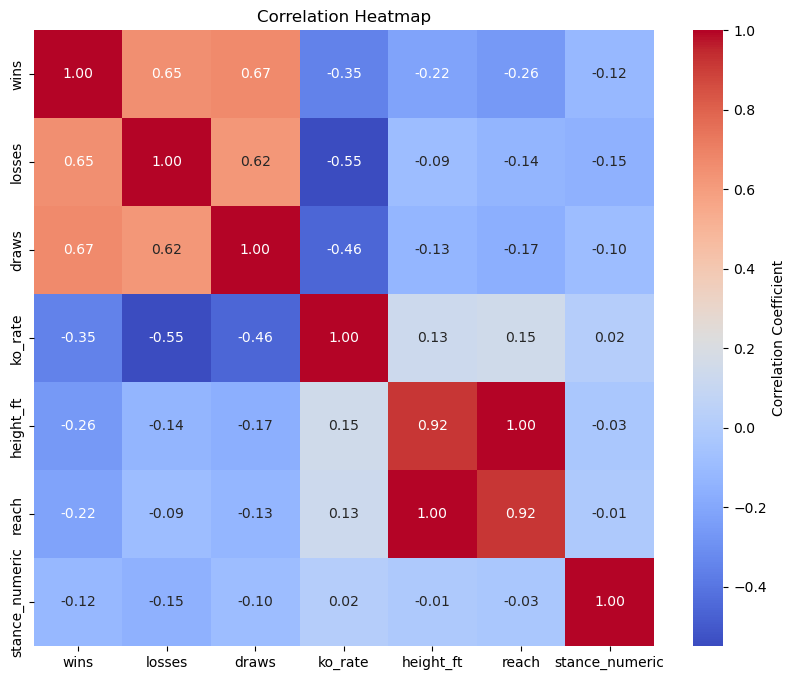

In [165]:
# Importing required packages

import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the correlation matrix for specific columns

plt.figure(figsize=(10,8))
heatmap = sns.heatmap(correlation_matrix[['wins','losses','draws','ko_rate','height_ft','reach','stance_numeric']].T, 
            cmap='coolwarm', 
            annot=True, 
            fmt='.2f', 
            cbar=True,
            xticklabels = ['wins','losses','draws','ko_rate','height_ft','reach','stance_numeric'])
colorbar = heatmap.collections[0].colorbar
colorbar.set_label('Correlation Coefficient')
plt.title('Correlation Heatmap')
plt.show()

### SECOND CSV FILE - POPULAR MATCHES

In [166]:
# Loading the popular_matches.csv file 

matches_df = pd.read_csv('popular_matches.csv')
matches_df.head()

,date,place,opponent_1,opponent_2,opponent_1_estimated_punch_power,opponent_2_estimated_punch_power,opponent_1_estimated_punch_resistance,opponent_2_estimated_punch_resistance,opponent_1_estimated_ability_to_take_punch,opponent_2_estimated_ability_to_take_punch,opponent_1_rounds_boxed,opponent_2_rounds_boxed,opponent_1_round_ko_percentage,opponent_2_round_ko_percentage,opponent_1_has_been_ko_percentage,opponent_2_has_been_ko_percentage,opponent_1_avg_weight,opponent_2_avg_weight,verdict
0,31-Aug-19,Unknown,Vasyl Lomachenko,Luke Campbell,72,72,73.9,60.5,78.0,73.0,119,130.0,8.40,12.31,0.00,0.00,127.11,135.24,Lomachenko won via UD in round 12
1,19-Sep-19,Unknown,Orlando Fiordigiglio,Sam Eggington,59,59,55.4,54.5,68.0,66.0,200,177.0,6.50,8.47,3.03,6.25,152.50,148.93,Eggington won via KO in round 2
2,5-Oct-19,Unknown,Gennady Golovkin,Sergiy Derevyanchenko,82,82,68.0,63.3,84.0,75.0,200,81.0,17.50,12.35,0.00,0.00,159.66,164.04,Golovkin won via UD in round 12
3,12-Oct-19,Unknown,Chazz Witherspoon,Oleksandr Usyk,69,69,59.6,68.9,79.0,80.0,182,125.0,15.93,9.60,4.76,NaN,292.71,200.10,Usyk won via RTD in round 7
4,27-Sep-19,Unknown,Ebenezer Tetteh,Daniel Dubois,46,46,NaN,44.4,50.0,69.0,38,39.0,23.68,30.77,0.00,0.00,178.67,230.38,Dubois won via TKO in round 1


In [167]:
# Drop specified columns from the DataFrame 'matches_df'

matches_df = matches_df.drop(columns = ['opponent_1_estimated_punch_power',
                                        'opponent_2_estimated_punch_power',
                                        'opponent_1_has_been_ko_percentage',
                                        'opponent_2_has_been_ko_percentage',
                                        'date','place'])

In [168]:
# To convert columns to uppercase string 

matches_df['opponent_1'] = matches_df['opponent_1'].str.upper()
matches_df['opponent_2'] = matches_df['opponent_2'].str.upper()

### SPLITTING 'verdict' COLUMN

In [169]:
# Splitting the verdict column into three columns named as name , way and roundnumber

if 'verdict' in matches_df.columns:
   
    matches_df[['name', 'way', 'roundnumber']] = matches_df['verdict'].str.split(' won via | in round ', expand=True)
    
matches_df.head()

,opponent_1,opponent_2,opponent_1_estimated_punch_resistance,opponent_2_estimated_punch_resistance,opponent_1_estimated_ability_to_take_punch,opponent_2_estimated_ability_to_take_punch,opponent_1_rounds_boxed,opponent_2_rounds_boxed,opponent_1_round_ko_percentage,opponent_2_round_ko_percentage,opponent_1_avg_weight,opponent_2_avg_weight,verdict,name,way,roundnumber
0,VASYL LOMACHENKO,LUKE CAMPBELL,73.9,60.5,78.0,73.0,119,130.0,8.40,12.31,127.11,135.24,Lomachenko won via UD in round 12,Lomachenko,UD,12
1,ORLANDO FIORDIGIGLIO,SAM EGGINGTON,55.4,54.5,68.0,66.0,200,177.0,6.50,8.47,152.50,148.93,Eggington won via KO in round 2,Eggington,KO,2
2,GENNADY GOLOVKIN,SERGIY DEREVYANCHENKO,68.0,63.3,84.0,75.0,200,81.0,17.50,12.35,159.66,164.04,Golovkin won via UD in round 12,Golovkin,UD,12
3,CHAZZ WITHERSPOON,OLEKSANDR USYK,59.6,68.9,79.0,80.0,182,125.0,15.93,9.60,292.71,200.10,Usyk won via RTD in round 7,Usyk,RTD,7
4,EBENEZER TETTEH,DANIEL DUBOIS,NaN,44.4,50.0,69.0,38,39.0,23.68,30.77,178.67,230.38,Dubois won via TKO in round 1,Dubois,TKO,1


### METADATA OF THE DATAFRAME

In [170]:
# Remove rows with any missing values from the DataFrame 'matches_df'

matches_df = matches_df.dropna()
matches_df.shape

(94, 16)

In [171]:
# Extract unique fighter names from the filtered dataset

unique_fighter_names = fighter_df['name'].unique()

# Extract unique opponent names from the matches dataset

unique_match_names = matches_df[['opponent_1', 'opponent_2']].stack().unique()

# Find the common names between the filtered dataset and the matches dataset

common_names = set(unique_fighter_names).intersection(unique_match_names)

# Display the common names

print(common_names)

{'SAUL ALVAREZ', 'MIKE TYSON', 'VASYL LOMACHENKO', 'DAVID PRICE', 'SERGIY DEREVYANCHENKO', 'MICHAEL SPINKS', 'DEONTAY WILDER', 'TYSON FURY', 'OTTO WALLIN', 'ANTHONY JOSHUA', 'CARL FRAMPTON', 'CHRIS EUBANK JR', 'LUKE CAMPBELL', 'TONY BELLEW', 'ANDY RUIZ JR', 'DOMINIC BREAZEALE', 'ADRIEN BRONER', 'GENNADY GOLOVKIN', 'FLOYD MAYWEATHER JR', 'NAOYA INOUE', 'WLADIMIR KLITSCHKO', 'ERROL SPENCE JR', 'SHAWN PORTER', 'MARVIN HAGLER', 'MIKEY GARCIA', 'ANDRE WARD', 'JOSEPH PARKER', 'GERALD WASHINGTON', 'ALEXANDER POVETKIN', 'ANTHONY CROLLA'}


In [172]:
# Info method on the dataframe

matches_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94 entries, 0 to 151
Data columns (total 16 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   opponent_1                                  94 non-null     object 
 1   opponent_2                                  94 non-null     object 
 2   opponent_1_estimated_punch_resistance       94 non-null     float64
 3   opponent_2_estimated_punch_resistance       94 non-null     float64
 4   opponent_1_estimated_ability_to_take_punch  94 non-null     float64
 5   opponent_2_estimated_ability_to_take_punch  94 non-null     float64
 6   opponent_1_rounds_boxed                     94 non-null     int64  
 7   opponent_2_rounds_boxed                     94 non-null     float64
 8   opponent_1_round_ko_percentage              94 non-null     float64
 9   opponent_2_round_ko_percentage              94 non-null     float64
 10  opponent_1_avg_weigh

In [173]:
# Describe method on the dataframe

matches_df.describe()

,opponent_1_estimated_punch_resistance,opponent_2_estimated_punch_resistance,opponent_1_estimated_ability_to_take_punch,opponent_2_estimated_ability_to_take_punch,opponent_1_rounds_boxed,opponent_2_rounds_boxed,opponent_1_round_ko_percentage,opponent_2_round_ko_percentage,opponent_1_avg_weight,opponent_2_avg_weight
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,57.556383,57.410638,73.712766,74.255319,161.840426,130.691489,13.924468,17.820532,182.474894,180.988511
std,11.767529,12.538127,13.290487,13.343224,86.382657,80.934598,7.872529,12.920541,67.161384,61.920306
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.350000,55.800000,72.000000,71.000000,109.250000,81.750000,8.410000,9.887500,141.815000,141.417500
50%,60.400000,60.600000,78.000000,77.000000,155.500000,114.500000,11.990000,13.555000,163.835000,163.390000
75%,63.900000,64.175000,79.750000,81.000000,217.750000,180.750000,17.747500,20.915000,237.572500,236.907500
max,73.900000,73.400000,86.000000,89.000000,462.000000,391.000000,47.060000,71.430000,432.860000,391.470000


### VISUALIZATION - BAR CHARTS

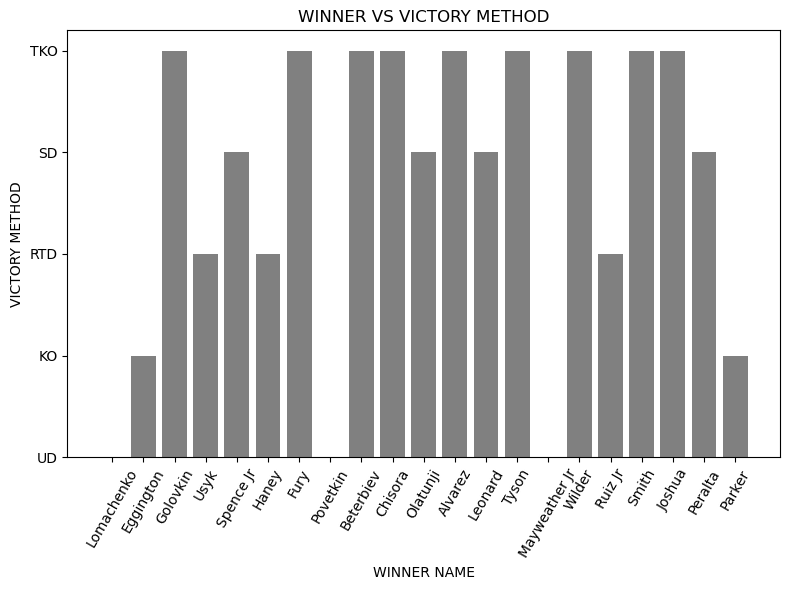

In [174]:
# Bar Chart - 1 

import matplotlib.pyplot as plt

subset_df = matches_df.head(35)  

plt.figure(figsize=(8, 6))
plt.bar(subset_df['name'], subset_df['way'], color='grey')
plt.title('WINNER VS VICTORY METHOD')
plt.xlabel('WINNER NAME')
plt.ylabel('VICTORY METHOD')
plt.xticks(rotation = 60)
plt.tight_layout()
plt.show()

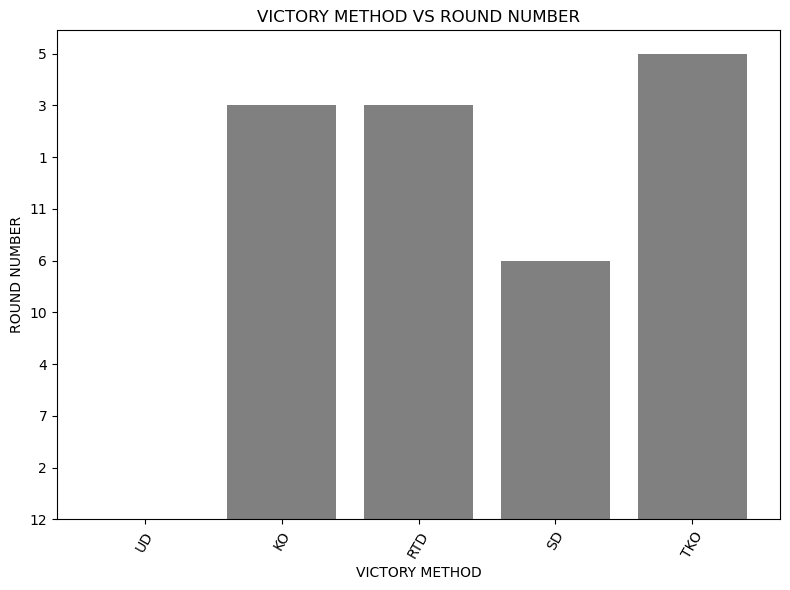

In [175]:
# Bar Chart - 2

import matplotlib.pyplot as plt
subset_df = matches_df.head(35)  

# Plot the bar chart using the subset DataFrame

plt.figure(figsize=(8, 6))
plt.bar(subset_df['way'], subset_df['roundnumber'], color='grey')
plt.title('VICTORY METHOD VS ROUND NUMBER')
plt.xlabel('VICTORY METHOD')
plt.ylabel('ROUND NUMBER')
plt.xticks(rotation = 60)
plt.tight_layout()
plt.show()

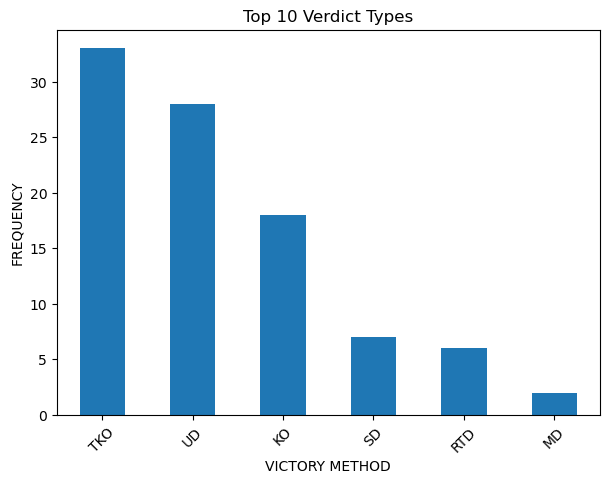

In [176]:
# Bar chart to show top 10 verdicts

import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
verdict_counts = matches_df['way'].value_counts().head(10)  
verdict_counts.plot(kind='bar')
plt.title('Top 10 Verdict Types')
plt.xlabel('VICTORY METHOD')
plt.ylabel('FREQUENCY')
plt.xticks(rotation=45)
plt.show()

### COLUMN CONVERSIONS

In [177]:
# Convert 'roundnumber' column to integer data type

matches_df['roundnumber'] = pd.to_numeric(matches_df['roundnumber'], errors='coerce')  # 'coerce' will convert non-numeric values to NaN

# Print data types of columns after conversion

print(matches_df.dtypes)

opponent_1                                     object
opponent_2                                     object
opponent_1_estimated_punch_resistance         float64
opponent_2_estimated_punch_resistance         float64
opponent_1_estimated_ability_to_take_punch    float64
opponent_2_estimated_ability_to_take_punch    float64
opponent_1_rounds_boxed                         int64
opponent_2_rounds_boxed                       float64
opponent_1_round_ko_percentage                float64
opponent_2_round_ko_percentage                float64
opponent_1_avg_weight                         float64
opponent_2_avg_weight                         float64
verdict                                        object
name                                           object
way                                            object
roundnumber                                     int64
dtype: object


### SPLITTING NAME COLUMN

In [178]:
# Split each full name into first and last names

matches_df['lastname_1'] = matches_df['opponent_1'].apply(lambda x: x.split()[-1])
matches_df['lastname_2'] = matches_df['opponent_2'].apply(lambda x: x.split()[-1])
matches_df.head()

,opponent_1,opponent_2,opponent_1_estimated_punch_resistance,opponent_2_estimated_punch_resistance,opponent_1_estimated_ability_to_take_punch,opponent_2_estimated_ability_to_take_punch,opponent_1_rounds_boxed,opponent_2_rounds_boxed,opponent_1_round_ko_percentage,opponent_2_round_ko_percentage,opponent_1_avg_weight,opponent_2_avg_weight,verdict,name,way,roundnumber,lastname_1,lastname_2
0,VASYL LOMACHENKO,LUKE CAMPBELL,73.9,60.5,78.0,73.0,119,130.0,8.40,12.31,127.11,135.24,Lomachenko won via UD in round 12,Lomachenko,UD,12,LOMACHENKO,CAMPBELL
1,ORLANDO FIORDIGIGLIO,SAM EGGINGTON,55.4,54.5,68.0,66.0,200,177.0,6.50,8.47,152.50,148.93,Eggington won via KO in round 2,Eggington,KO,2,FIORDIGIGLIO,EGGINGTON
2,GENNADY GOLOVKIN,SERGIY DEREVYANCHENKO,68.0,63.3,84.0,75.0,200,81.0,17.50,12.35,159.66,164.04,Golovkin won via UD in round 12,Golovkin,UD,12,GOLOVKIN,DEREVYANCHENKO
3,CHAZZ WITHERSPOON,OLEKSANDR USYK,59.6,68.9,79.0,80.0,182,125.0,15.93,9.60,292.71,200.10,Usyk won via RTD in round 7,Usyk,RTD,7,WITHERSPOON,USYK
5,SHAWN PORTER,ERROL SPENCE JR,63.8,62.3,80.0,77.0,219,108.0,7.76,19.44,152.53,148.47,Spence Jr won via SD in round 12,Spence Jr,SD,12,PORTER,JR


### ENCODING COLUMNS FOR MODELS

In [179]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'data' is your DataFrame containing the dataset

le = LabelEncoder()
matches_df['lastname_1_encoded'] = le.fit_transform(matches_df['lastname_1'])
matches_df['lastname_2_encoded'] = le.fit_transform(matches_df['lastname_2'])
matches_df['way_encoded'] = le.fit_transform(matches_df['way'])
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94 entries, 0 to 151
Data columns (total 21 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   opponent_1                                  94 non-null     object 
 1   opponent_2                                  94 non-null     object 
 2   opponent_1_estimated_punch_resistance       94 non-null     float64
 3   opponent_2_estimated_punch_resistance       94 non-null     float64
 4   opponent_1_estimated_ability_to_take_punch  94 non-null     float64
 5   opponent_2_estimated_ability_to_take_punch  94 non-null     float64
 6   opponent_1_rounds_boxed                     94 non-null     int64  
 7   opponent_2_rounds_boxed                     94 non-null     float64
 8   opponent_1_round_ko_percentage              94 non-null     float64
 9   opponent_2_round_ko_percentage              94 non-null     float64
 10  opponent_1_avg_weigh

### K NEAREST NEIGHBOR CLASSIFIER - VICTORY METHOD

In [180]:
# K Nearest Neighbor Classifier

import timeit

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

knn_tic = timeit.default_timer()

# Assuming df contains your preprocessed DataFrame with 'roundnumber', 'name', and 'way' columns

X = matches_df[['lastname_1_encoded','lastname_2_encoded',
                'roundnumber',
                'opponent_1_estimated_punch_resistance','opponent_2_estimated_punch_resistance',
                'opponent_1_avg_weight','opponent_2_avg_weight',
                'opponent_1_round_ko_percentage','opponent_2_round_ko_percentage',
                'opponent_1_estimated_ability_to_take_punch','opponent_2_estimated_ability_to_take_punch',
                'opponent_1_rounds_boxed','opponent_2_rounds_boxed',
                'way_encoded']]  
y = matches_df['way']  

# Normalize features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size = 0.4, random_state = 42)

# Instantiate KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors as needed

# Fit the model
knn_classifier.fit(X_train, y_train)

knn_toc = timeit.default_timer() - knn_tic

# Make predictions
y_pred = knn_classifier.predict(X_test)

# Evaluate model performance
knn_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", knn_accuracy)
print ('KNN time:', knn_toc)

Accuracy: 0.6842105263157895
KNN time: 0.01000762500007113


### CLASSIFICATION REPORT - KNN CLASSIFIER

In [181]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          KO       0.71      0.71      0.71         7
          MD       0.00      0.00      0.00         1
         RTD       0.00      0.00      0.00         2
          SD       0.50      0.25      0.33         4
         TKO       0.64      0.75      0.69        12
          UD       0.73      0.92      0.81        12

    accuracy                           0.68        38
   macro avg       0.43      0.44      0.43        38
weighted avg       0.62      0.68      0.64        38



### CONFUSION MATRIX - KNN CLASSIFIER

In [182]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[ 5  0  0  0  2  0]
 [ 0  0  0  0  1  0]
 [ 1  0  0  0  1  0]
 [ 0  0  0  1  1  2]
 [ 1  0  0  0  9  2]
 [ 0  0  0  1  0 11]]


### STOCHASTIC GRADIENT DESCENT CLASSIFIER - VICTORY METHOD

In [183]:
# SGD Classifier

from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

sgdc_tic = timeit.default_timer()

# Assuming df contains your preprocessed DataFrame with 'roundnumber', 'name', and 'way' columns

X = matches_df[['lastname_1_encoded','lastname_2_encoded',
                'roundnumber',
                'opponent_1_estimated_punch_resistance','opponent_2_estimated_punch_resistance',
                'opponent_1_avg_weight','opponent_2_avg_weight',
                'opponent_1_round_ko_percentage','opponent_2_round_ko_percentage',
                'opponent_1_estimated_ability_to_take_punch','opponent_2_estimated_ability_to_take_punch',
                'opponent_1_rounds_boxed','opponent_2_rounds_boxed',
                'way_encoded']]  
y = matches_df['way']             # Target variable

# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 20)

# Create SGDC pipeline with feature scaling

sgdc_pipeline = make_pipeline(StandardScaler(), SGDClassifier(random_state = 50))

# Fit the model

sgdc_pipeline.fit(X_train, y_train)

sgdc_toc = timeit.default_timer() - sgdc_tic

# Make predictions

y_pred = sgdc_pipeline.predict(X_test)

# Evaluate model performance

sgd_accuracy = accuracy_score(y_test, y_pred)
print("SGDC Accuracy:", sgd_accuracy)
print("SGDC Time :", sgdc_toc )

SGDC Accuracy: 0.7894736842105263
SGDC Time : 0.01356187500005035


### CLASSIFICATION REPORT - SGD CLASSIFIER

In [184]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          KO       0.50      1.00      0.67         1
         RTD       0.00      0.00      0.00         2
          SD       0.00      0.00      0.00         1
         TKO       0.83      0.83      0.83         6
          UD       0.90      1.00      0.95         9

    accuracy                           0.79        19
   macro avg       0.45      0.57      0.49        19
weighted avg       0.72      0.79      0.75        19



### CONFUSION MATRIX - SGD CLASSIFIER

In [185]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[1 0 0 0 0]
 [1 0 0 1 0]
 [0 0 0 0 1]
 [0 0 1 5 0]
 [0 0 0 0 9]]


### DECISION TREE CLASSIFIER - VICTORY METHOD

In [186]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

dct_tic = timeit.default_timer()

X = matches_df[['lastname_1_encoded','lastname_2_encoded','roundnumber',
                'opponent_1_estimated_punch_resistance','opponent_2_estimated_punch_resistance',
                'opponent_1_avg_weight','opponent_2_avg_weight',
                'opponent_1_round_ko_percentage','opponent_2_round_ko_percentage',
                'opponent_1_estimated_ability_to_take_punch','opponent_2_estimated_ability_to_take_punch',
                'opponent_1_rounds_boxed','opponent_2_rounds_boxed','way_encoded']]  
y = matches_df['way']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.6, random_state = 42)

# Instantiate Decision Tree classifier

decision_tree = DecisionTreeClassifier(random_state = 50)

# Fit the model

decision_tree.fit(X_train, y_train)

dct_toc = timeit.default_timer() - dct_tic

y_pred = decision_tree.predict(X_test)

# Evaluate model performance

dct_accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Classifier Accuracy:", dct_accuracy)
print ('Decision Tree Classifier time: ', dct_toc)

Decision Tree Classifier Accuracy: 0.9649122807017544
Decision Tree Classifier time:  0.00502995899933012


### CLASSIFICATION REPORT - DECISION TREE CLASSIFIER

In [187]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          KO       1.00      1.00      1.00         9
          MD       0.00      0.00      0.00         1
         RTD       0.67      0.67      0.67         3
          SD       1.00      1.00      1.00         4
         TKO       1.00      1.00      1.00        22
          UD       1.00      1.00      1.00        18

    accuracy                           0.96        57
   macro avg       0.78      0.78      0.78        57
weighted avg       0.96      0.96      0.96        57



### CONFUSION MATRIX - DECISION TREE CLASSIFIER

In [188]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[ 9  0  0  0  0  0]
 [ 0  0  1  0  0  0]
 [ 0  1  2  0  0  0]
 [ 0  0  0  4  0  0]
 [ 0  0  0  0 22  0]
 [ 0  0  0  0  0 18]]


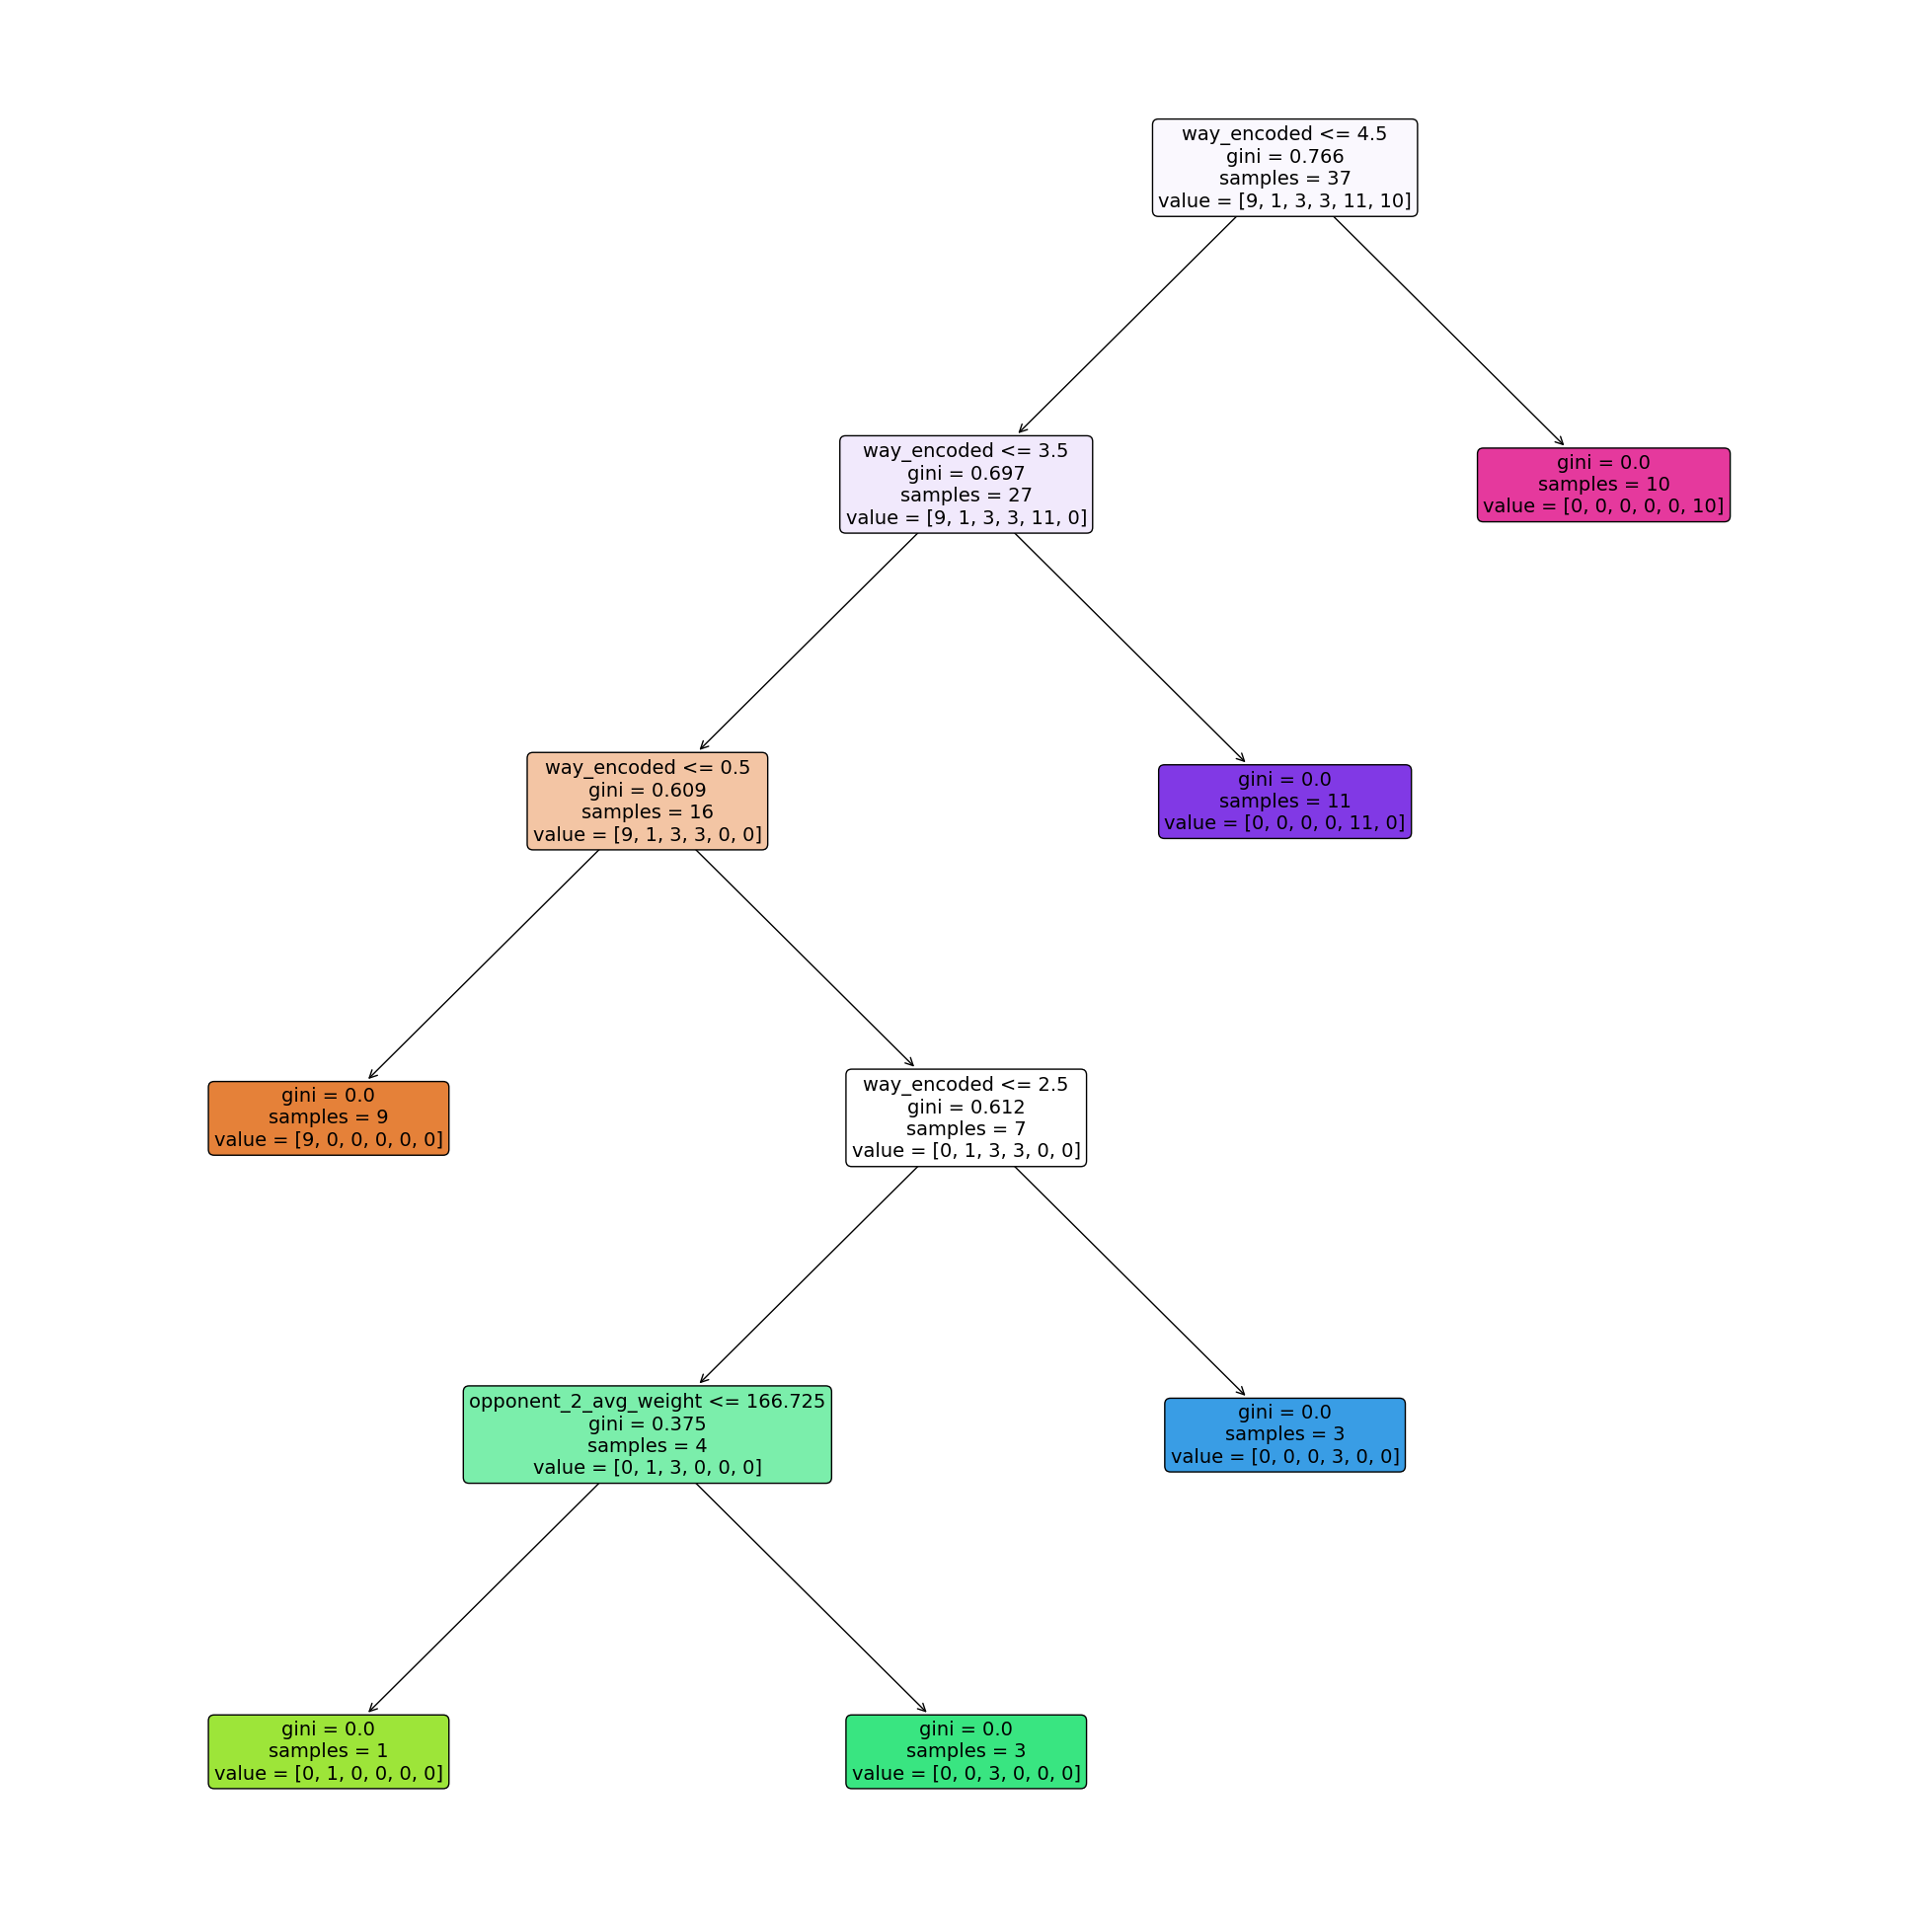

In [189]:
# Decision Tree

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Define the feature names

feature_names =['lastname_1_encoded','lastname_2_encoded','roundnumber',
                'opponent_1_estimated_punch_resistance','opponent_2_estimated_punch_resistance',
                'opponent_1_avg_weight','opponent_2_avg_weight',
                'opponent_1_round_ko_percentage','opponent_2_round_ko_percentage',
                'opponent_1_estimated_ability_to_take_punch','opponent_2_estimated_ability_to_take_punch',
                'opponent_1_rounds_boxed','opponent_2_rounds_boxed','way_encoded']

# Plotting the decision tree

plt.figure(figsize=(25, 25))
decision_tree_plot = plot_tree(decision_tree,
                               feature_names=feature_names,
                               filled=True, rounded=True,
                               fontsize=14)
plt.show()

### RANDOM FOREST CLASSIFIER - VICTORY METHOD 

In [190]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import timeit
import warnings
warnings.filterwarnings('ignore')

rf_tic = timeit.default_timer()

# Assuming df contains your preprocessed DataFrame with 'lastname_1_encoded', 'lastname_2_encoded', 'roundnumber',
# 'opponent_1_estimated_punch_resistance', 'opponent_2_estimated_punch_resistance', 'opponent_1_avg_weight',
# 'opponent_2_avg_weight', 'opponent_1_round_ko_percentage', 'opponent_2_round_ko_percentage',
# 'opponent_1_estimated_ability_to_take_punch', 'opponent_2_estimated_ability_to_take_punch',
# 'opponent_1_rounds_boxed', 'opponent_2_rounds_boxed', 'way_encoded' columns

X = matches_df[['lastname_1_encoded', 'lastname_2_encoded', 'roundnumber',
                'opponent_1_estimated_punch_resistance', 'opponent_2_estimated_punch_resistance',
                'opponent_1_avg_weight', 'opponent_2_avg_weight',
                'opponent_1_round_ko_percentage', 'opponent_2_round_ko_percentage',
                'opponent_1_estimated_ability_to_take_punch', 'opponent_2_estimated_ability_to_take_punch',
                'opponent_1_rounds_boxed', 'opponent_2_rounds_boxed',
                'way_encoded']]
y = matches_df['way']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Instantiate Random Forest classifier
random_forest = RandomForestClassifier(random_state=50)

# Fit the model
random_forest.fit(X_train, y_train)

rf_toc = timeit.default_timer() - rf_tic

# Make predictions
y_pred = random_forest.predict(X_test)

# Evaluate model performance
rf_accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Classifier Accuracy:", rf_accuracy)
print("Random Forest Classifier Time:", rf_toc)

Random Forest Classifier Accuracy: 0.8421052631578947
Random Forest Classifier Time: 0.04891016600049625


### CLASSIFICATION REPORT - RANDOM FOREST CLASSIFIER

In [191]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          KO       1.00      1.00      1.00         7
          MD       0.00      0.00      0.00         1
         RTD       1.00      0.50      0.67         2
          SD       0.00      0.00      0.00         4
         TKO       0.86      1.00      0.92        12
          UD       0.75      1.00      0.86        12

    accuracy                           0.84        38
   macro avg       0.60      0.58      0.57        38
weighted avg       0.74      0.84      0.78        38



### CONFUSION MATRIX - RANDOM FOREST CLASSIFIER

In [192]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[ 7  0  0  0  0  0]
 [ 0  0  0  0  0  1]
 [ 0  0  1  0  1  0]
 [ 0  0  0  0  1  3]
 [ 0  0  0  0 12  0]
 [ 0  0  0  0  0 12]]


### XGB CLASSIFIER - VICTORY METHOD

In [193]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import timeit

# Start time measurement
xgb_tic = timeit.default_timer()

# Assuming df contains your preprocessed DataFrame with 'lastname_1_encoded', 'lastname_2_encoded', 'roundnumber',
# 'opponent_1_estimated_punch_resistance', 'opponent_2_estimated_punch_resistance', 'opponent_1_avg_weight',
# 'opponent_2_avg_weight', 'opponent_1_round_ko_percentage', 'opponent_2_round_ko_percentage',
# 'opponent_1_estimated_ability_to_take_punch', 'opponent_2_estimated_ability_to_take_punch',
# 'opponent_1_rounds_boxed', 'opponent_2_rounds_boxed', 'way_encoded' columns

# Features (X) and target variable (y)
X = matches_df[['lastname_1_encoded', 'lastname_2_encoded', 'roundnumber',
                'opponent_1_estimated_punch_resistance', 'opponent_2_estimated_punch_resistance',
                'opponent_1_avg_weight', 'opponent_2_avg_weight',
                'opponent_1_round_ko_percentage', 'opponent_2_round_ko_percentage',
                'opponent_1_estimated_ability_to_take_punch', 'opponent_2_estimated_ability_to_take_punch',
                'opponent_1_rounds_boxed', 'opponent_2_rounds_boxed',
                'way_encoded']]
y = matches_df['way']

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.4, random_state=42)

# Instantiate XGBoost classifier
xgb_classifier = XGBClassifier(random_state=50)

# Fit the model
xgb_classifier.fit(X_train, y_train)

# Stop time measurement and calculate elapsed time
xgb_toc = timeit.default_timer() - xgb_tic

# Make predictions
y_pred_xgb = xgb_classifier.predict(X_test)

# Evaluate model performance
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Classifier Accuracy:", xgb_accuracy)
print("XGBoost Classifier Time:", xgb_toc)

XGBoost Classifier Accuracy: 0.8947368421052632
XGBoost Classifier Time: 0.13602916700074275


### CLASSIFICATION REPORT - XGB MODEL

In [194]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.00      0.00      0.00         1
           2       1.00      1.00      1.00         2
           3       1.00      0.25      0.40         4
           4       0.92      1.00      0.96        12
           5       0.86      1.00      0.92        12

    accuracy                           0.89        38
   macro avg       0.80      0.71      0.71        38
weighted avg       0.90      0.89      0.87        38



### CONFUSION MATRIX - XGB CLASSIFIER

In [195]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred_xgb))

[[ 7  0  0  0  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  2  0  0  0]
 [ 0  1  0  1  0  2]
 [ 0  0  0  0 12  0]
 [ 0  0  0  0  0 12]]


### ADA BOOST CLASSIFIER - VICTORY METHOD 

In [196]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import timeit
import warnings
warnings.filterwarnings('ignore')

ada_tic = timeit.default_timer()

X = matches_df[['lastname_1_encoded', 'lastname_2_encoded', 'roundnumber',
                'opponent_1_estimated_punch_resistance', 'opponent_2_estimated_punch_resistance',
                'opponent_1_avg_weight', 'opponent_2_avg_weight',
                'opponent_1_round_ko_percentage', 'opponent_2_round_ko_percentage',
                'opponent_1_estimated_ability_to_take_punch', 'opponent_2_estimated_ability_to_take_punch',
                'opponent_1_rounds_boxed', 'opponent_2_rounds_boxed',
                'way_encoded']]
y = matches_df['way']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Instantiate AdaBoost classifier
ada_boost = AdaBoostClassifier(random_state=50)

# Fit the model
ada_boost.fit(X_train, y_train)

ada_toc = timeit.default_timer() - ada_tic

# Make predictions
y_pred = ada_boost.predict(X_test)

# Evaluate model performance
ada_accuracy = accuracy_score(y_test, y_pred)
print("AdaBoost Classifier Accuracy:", ada_accuracy)
print("AdaBoost Classifier Time:", ada_toc)

AdaBoost Classifier Accuracy: 0.7631578947368421
AdaBoost Classifier Time: 0.04002095800024108


### CLASSIFICATION REPORT - ADA BOOST CLASSIFIER

In [197]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          KO       1.00      1.00      1.00         7
          MD       0.00      0.00      0.00         1
         RTD       0.00      0.00      0.00         2
          SD       0.00      0.00      0.00         4
         TKO       0.61      0.92      0.73        12
          UD       1.00      0.92      0.96        12

    accuracy                           0.76        38
   macro avg       0.44      0.47      0.45        38
weighted avg       0.69      0.76      0.72        38



### CONFUSION MATRIX - ADA BOOST CLASSIFIER

In [198]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[ 7  0  0  0  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  4  0]
 [ 0  1  0  0 11  0]
 [ 0  1  0  0  0 11]]


### BAGGING CLASSIFIER - VICTORY METHOD

In [199]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import timeit

# Start time measurement
bagging_tic = timeit.default_timer()

X = matches_df[['lastname_1_encoded', 'lastname_2_encoded', 'roundnumber',
                'opponent_1_estimated_punch_resistance', 'opponent_2_estimated_punch_resistance',
                'opponent_1_avg_weight', 'opponent_2_avg_weight',
                'opponent_1_round_ko_percentage', 'opponent_2_round_ko_percentage',
                'opponent_1_estimated_ability_to_take_punch', 'opponent_2_estimated_ability_to_take_punch',
                'opponent_1_rounds_boxed', 'opponent_2_rounds_boxed',
                'way_encoded']]
y = matches_df['way']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Base estimator (Decision Tree Classifier)
base_estimator = DecisionTreeClassifier(random_state=50)

# Instantiate Bagging Classifier
bagging_classifier = BaggingClassifier(base_estimator=base_estimator, n_estimators=10, random_state=50)

# Fit the model
bagging_classifier.fit(X_train, y_train)

# Stop time measurement and calculate elapsed time
bagging_toc = timeit.default_timer() - bagging_tic

# Make predictions
y_pred = bagging_classifier.predict(X_test)

# Evaluate model performance
bg_accuracy = accuracy_score(y_test, y_pred)
print("Bagging Classifier Accuracy:", bg_accuracy)
print("Bagging Classifier Time:", bagging_toc)

Bagging Classifier Accuracy: 0.9473684210526315
Bagging Classifier Time: 0.010261874999741849


### CLASSIFICATION REPORT - BAGGING CLASSIFIER

In [200]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          KO       0.88      1.00      0.93         7
          MD       0.00      0.00      0.00         1
         RTD       1.00      0.50      0.67         2
          SD       0.80      1.00      0.89         4
         TKO       1.00      1.00      1.00        12
          UD       1.00      1.00      1.00        12

    accuracy                           0.95        38
   macro avg       0.78      0.75      0.75        38
weighted avg       0.93      0.95      0.93        38



### CONFUSION MATRIX 

In [201]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[ 7  0  0  0  0  0]
 [ 1  0  0  0  0  0]
 [ 0  0  1  1  0  0]
 [ 0  0  0  4  0  0]
 [ 0  0  0  0 12  0]
 [ 0  0  0  0  0 12]]


### STACKING CLASSIFIER - VICTORY METHOD 

In [202]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import timeit
import warnings
warnings.filterwarnings('ignore')

stacking_tic = timeit.default_timer()

X = matches_df[['lastname_1_encoded', 'lastname_2_encoded', 'roundnumber',
                'opponent_1_estimated_punch_resistance', 'opponent_2_estimated_punch_resistance',
                'opponent_1_avg_weight', 'opponent_2_avg_weight',
                'opponent_1_round_ko_percentage', 'opponent_2_round_ko_percentage',
                'opponent_1_estimated_ability_to_take_punch', 'opponent_2_estimated_ability_to_take_punch',
                'opponent_1_rounds_boxed', 'opponent_2_rounds_boxed',
                'way_encoded']]
y = matches_df['way']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Base estimators
base_estimators = [
    ('dt', DecisionTreeClassifier(random_state=50)),
    ('svc', SVC(random_state=50))
]

# Meta-estimator
meta_estimator = LogisticRegression()

# Instantiate stacking classifier
stacking_classifier = StackingClassifier(estimators=base_estimators, final_estimator=meta_estimator)

# Fit the model
stacking_classifier.fit(X_train, y_train)

stacking_toc = timeit.default_timer() - stacking_tic

# Make predictions
y_pred = stacking_classifier.predict(X_test)

# Evaluate model performance
sc_accuracy = accuracy_score(y_test, y_pred)
print("Stacking Classifier Accuracy:", sc_accuracy)
print("Stacking Classifier Time:", stacking_toc)

Stacking Classifier Accuracy: 0.18421052631578946
Stacking Classifier Time: 0.0371215420000226


### CLASSIFICATION REPORT - STACKING CLASSIFIER

In [203]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          KO       0.18      1.00      0.31         7
          MD       0.00      0.00      0.00         1
         RTD       0.00      0.00      0.00         2
          SD       0.00      0.00      0.00         4
         TKO       0.00      0.00      0.00        12
          UD       0.00      0.00      0.00        12

    accuracy                           0.18        38
   macro avg       0.03      0.17      0.05        38
weighted avg       0.03      0.18      0.06        38



### CONFUSION MATRIX - STACKING CLASSIFIER

In [204]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[ 7  0  0  0  0  0]
 [ 1  0  0  0  0  0]
 [ 2  0  0  0  0  0]
 [ 4  0  0  0  0  0]
 [12  0  0  0  0  0]
 [12  0  0  0  0  0]]


## MODEL PERFORMANCE EVALUATION

### ACCURACY COMPARISON OF DIFFERENT MODELS

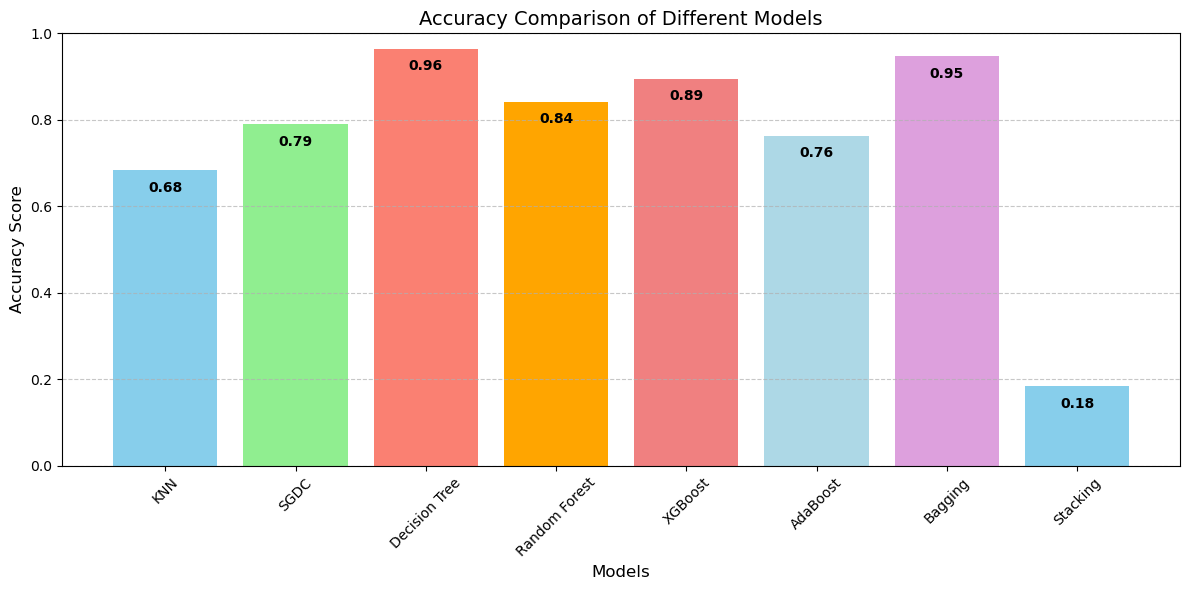

In [205]:
import matplotlib.pyplot as plt

# Model names
models = ['KNN', 'SGDC', 'Decision Tree', 'Random Forest', 'XGBoost', 'AdaBoost','Bagging', 'Stacking']

# Accuracy scores
accuracy_scores = [knn_accuracy, sgd_accuracy, dct_accuracy, rf_accuracy, xgb_accuracy, ada_accuracy, bg_accuracy, sc_accuracy]

# Define custom colors
colors = ['skyblue', 'lightgreen', 'salmon', 'orange', 'lightcoral', 'lightblue', 'plum']

# Create bar graph for accuracy
plt.figure(figsize=(12, 6))
bars = plt.bar(models, accuracy_scores, color=colors)

# Add annotations
for bar, accuracy in zip(bars, accuracy_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height() - 0.05, 
             f'{accuracy:.2f}', 
             ha='center', 
             color='black', 
             fontsize=10,
             fontweight='bold')

plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy Score', fontsize=12)
plt.title('Accuracy Comparison of Different Models', fontsize=14)
plt.ylim(0, 1)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### EXECUTION TIME COMPARISON FOR DIFFERENT MODELS

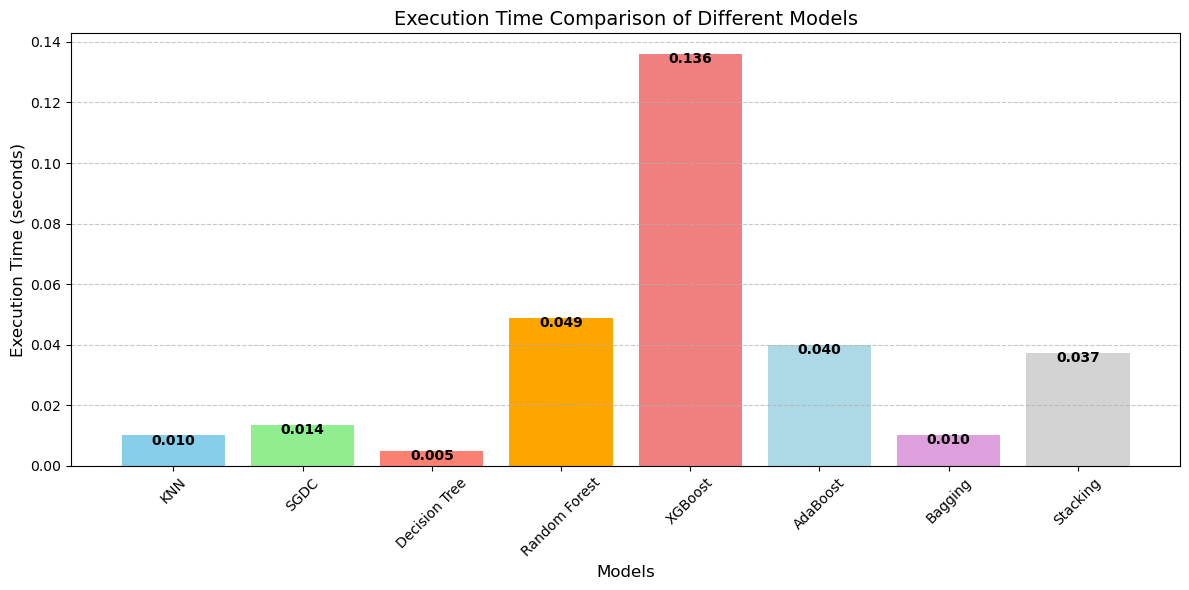

In [206]:
import matplotlib.pyplot as plt

# Model names
models = ['KNN', 'SGDC', 'Decision Tree', 'Random Forest', 'XGBoost', 'AdaBoost', 'Bagging', 'Stacking']

# Execution times
execution_times = [knn_toc, sgdc_toc, dct_toc, rf_toc, xgb_toc, ada_toc, bagging_toc, stacking_toc]

# Define custom colors
colors = ['skyblue', 'lightgreen', 'salmon', 'orange', 'lightcoral', 'lightblue', 'plum', 'lightgray']

# Create bar graph for execution times
plt.figure(figsize=(12, 6))
bars = plt.bar(models, execution_times, color=colors)

# Add annotations
for bar, time in zip(bars, execution_times):
    plt.text(bar.get_x() + bar.get_width() / 2, 
             bar.get_height() - 0.003, 
             f'{time:.3f}', 
             ha='center', 
             color='black', 
             fontsize=10,
             fontweight='bold')

plt.xlabel('Models', fontsize=12)
plt.ylabel('Execution Time (seconds)', fontsize=12)
plt.title('Execution Time Comparison of Different Models', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## CONCLUSION 

### Dataset and target column


We have two datasets namely "fighters.csv" and "popular_matches.csv." The first dataset contains information about fighters, including their stance, wins, losses, age, etc., while the second dataset records the outcomes of matches between fighters, focusing on the victory method of the winner, captured in a column named "way."

### Data Preparation

#### fighters.csv
- This file was carefully inspected to ensure there were no missing values.
- We corrected a typo in one of the column names, changing "looses" to "losses" to maintain accuracy.
- We standardized the "name" column to uppercase letters and reformatted the "height" column to a consistent feet and inches format for uniformity.
- We refined our dataset by including fighters with more than 10 fights and removing entries with the string "Unknown" to enhance data quality.

#### matches.csv
- We addressed the presence of null values by removing entries affected by them, considering the relatively low count of such values.
- Two columns indicating the estimated punch power for both fighters were dropped due to identical values across all entries, rendering them redundant.
- We split the "lastname" column into "lastname_1" and "lastname_2" for the two opponents and encoded several columns including "way," "lastname," and "firstname" to better suit our predictive models.
- The "verdict" column was split into three distinct columns: "name," "way," and "round number" to simplify analysis.

### Model Implementation

We employed various models to predict the victory method of the winner: K Nearest Neighbor classifier, Stochastic Gradient Descent classifier, Decision Tree classifier, Random Forest classifier, XGBoost classifier, ADABoost classifier, Bagging classifier, and a Stacking classifier.

The Decision Tree classifier emerged as the top performer, boasting an impressive accuracy rate of 0.96. On the other end of the spectrum, the Stacking classifier had the lowest accuracy rate, around 0.18. 

In terms of efficiency, the KNN classifier had the quickest execution time, while the XGBoost classifier took the longest.

### Insights and Recommendations

Incorporating more detailed characteristics of the fighters into the "matches" dataset could potentially enhance the accuracy of our predictions regarding the winners and their victory methods. For future improvements, expanding the dataset with additional information on fighter characteristics is crucial, as these elements play a significant role in accurately predicting the outcomes of matches.